### Predicting the percentage of student based on number of study hours with Linear Regression.

**Task:**
   - Have to predict the percentage of a student based on the number of study hours.
   - source of the data : http://bit.ly/w-data
   

In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [74]:
#importing the data

df=pd.read_csv('student_scores - student_scores.csv')

In [78]:
df.style.background_gradient(cmap=sns.color_palette('Greys',as_cmap=True),high=1,low=1.6)

,Hours,Scores
0,2.500000,21
1,5.100000,47
2,3.200000,27
3,8.500000,75
4,3.500000,30
5,1.500000,20
6,9.200000,88
7,5.500000,60
8,8.300000,81
9,2.700000,25


- Each row having a similar color is an indication of variables having high correlation

In [59]:
#getting the shape of the data
print("Shape:",df.shape)

Shape: (25, 2)


In [4]:
#checking for null values in each column.
print(df['Hours'].isna().sum())
print(df['Scores'].isna().sum())

0
0


In [5]:
#description of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


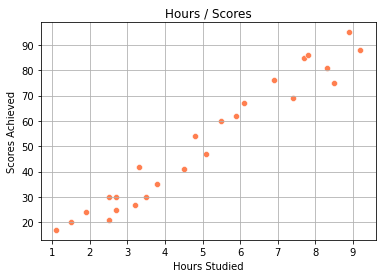

In [6]:
#plotting our coordinates(Hours,Scores) with scatterplot.
x=sns.scatterplot(data=df,x='Hours',y='Scores',color='coral')
plt.title( 'Hours / Scores' )
plt.xlabel( 'Hours Studied' )
plt.ylabel('Scores Achieved')
plt.grid()

We can see that there is linearity between the two coordinates.which shows if a student studies for longer duration ,he will certainly get better score.

In [7]:
#extracting the columns and putting them inside the variables
x=df.iloc[:,:-1].values  # df['Hours']
y=df.iloc[:,1].values  #df['Scores']

from sklearn.model_selection import train_test_split
#Splitting our dataset into train and test set with 80:20 ratio.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)    #fitting our train data into linear regression model
y_pred=regressor.predict(x_test)
print(y_pred) #predicted
print(y_test) #actual

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
[20 27 69 30 62]


In [9]:
def Visualization(x,y):
    '''This function visualizes the results of given set with linear regression given x and y'''
    plt.scatter(x,y,color='coral')
    plt.plot(x,regressor.predict(x),color='black')
    plt.title('Hours vs Scores')
    plt.xlabel('Hours_Studied')
    plt.ylabel('Scores_achieved')
    return plt.show()
help(Visualization)

Help on function Visualization in module __main__:

Visualization(x, y)
    This function visualizes the results of given set with linear regression given x and y



Visualization of Train Set:


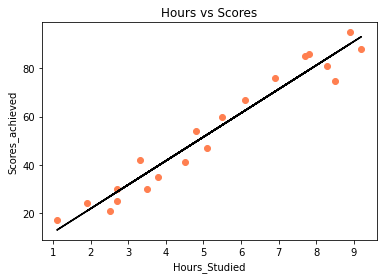



Visualization of Test Set:


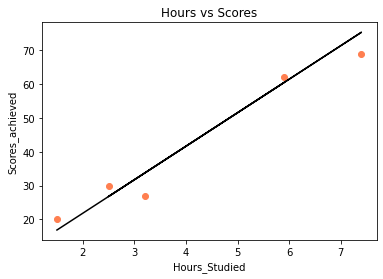

In [10]:
print("Visualization of Train Set:")
Visualization(x_train,y_train)
print("\n\nVisualization of Test Set:")
Visualization(x_test,y_test)

On the Visualization our Train model we have the regression line (which shows the predicted scores) which is very close to points which are actual scores(coral colored points).

and now after visualizing our test model which hasn't been trained yet ,here we can observe that model is still predicting the scores pretty accurate for the newer points also.

Which implies our model is working properly.

In [17]:
df1=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [11]:
from sklearn.metrics import r2_score #We can also use MSE/RMSE or MAE
r2_score(y_test,y_pred)    
# our model is performing worst if value is negative,is at constant if 0 and nearly perfect if the value lies close to 1.


0.9454906892105355

help(r2_score)
- Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse)
- A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a :math:`R^2` score of 0.0.
    
If we get the values as negative we can still minimize the big errors with the help of taking squares such that both negative and positive points will be on positive side ( ignoring small errors for fixing the Big Errors) such that we will get and idea that how well our model is working i.e, Higher Varience = higher the negative value: Model is not fitting properly.

## What will be the predicted score if a student studies 9.25 Hours per day ?

In [12]:
predicted_score=float(regressor.predict([[9.25]]))
print(f"If a student studies 9.25 hours a day, He's predicted score will be {predicted_score}.")

If a student studies 9.25 hours a day, He's predicted score will be 93.69173248737535.
